# Load data

In [1]:
import pandas as pd
digits = pd.read_csv("mnist_train.csv")

In [2]:
# create a subset that doesnt include the label
digitsnolab = digits.iloc[0:, 1:785]
type(digitsnolab)

pandas.core.frame.DataFrame

In [3]:
print(digits.shape)
# the dimensionality of the data is 785, with 60,000 observations.
# type(digits)
d_sub = digits[(digits['label']==0) | (digits['label'] == 1) | (digits['label'] == 2) | (digits['label'] == 3)]
d_sub = d_sub.iloc[0:100, :]
print(d_sub.shape)

(60000, 785)
(100, 785)


# PCA for digits dataset

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

Text(0.5, 0, 'PC1')

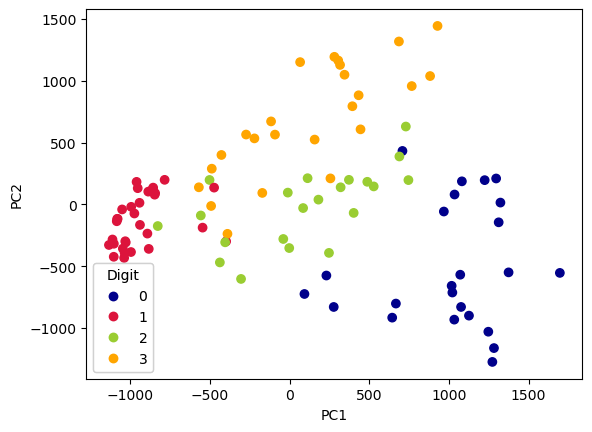

<Figure size 600x600 with 0 Axes>

In [21]:
pca = PCA(n_components = 2)

pca.fit(d_sub)
digits_pca = pca.transform(d_sub)

fig,ax = plt.subplots()

colmap = ListedColormap(["darkblue", "crimson", "yellowgreen", "orange"])

plt.figure(figsize = (6,6)) # select figure size
pcaplot = ax.scatter(digits_pca[:,0], digits_pca[:,1], c = d_sub['label'], cmap = colmap)


legend1 = ax.legend(*pcaplot.legend_elements(),
                    loc="lower left", title="Digit")
ax.add_artist(legend1)
        
#pcaplot.set(xlabel = "PC1", ylabel = "PC2")
#plt.xlabel('PC1')
#plt.ylabel('PC2')

ax.set_ylabel('PC2')
#ax.set_ylim(-2500, 2500)
ax.set_xlabel('PC1')
#ax.set_xlim(-2500, 2500)

#plt.show()

# GPLVM on digits dataset

In [6]:
import GPy
import numpy as np
np.random.seed(123)

### Using Linear kernel 

In [7]:
d_sub_gp = d_sub.to_numpy()
labels = d_sub_gp[0:100, 0]
d_sub_gp = d_sub_gp[0:100, 1:]

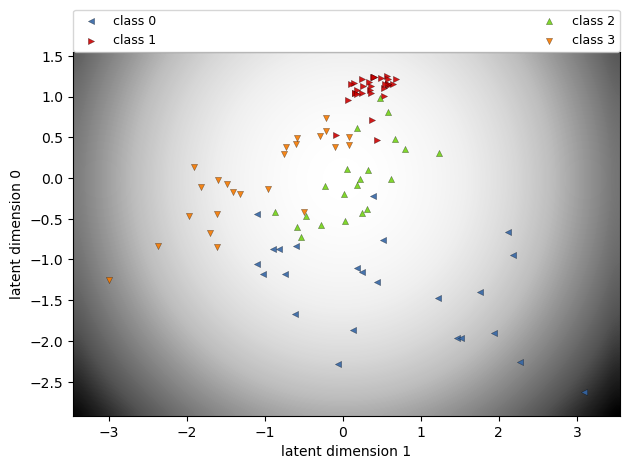

In [8]:
#latent dimension = q
q = 2

#digits gplvm
d_gplvm1 = GPy.models.GPLVM(d_sub_gp, q, kernel = GPy.kern.Linear(q))

#d_gplvm

d_gplvm1.plot_latent(labels = labels)
plt.show()

### Using RBF kernel

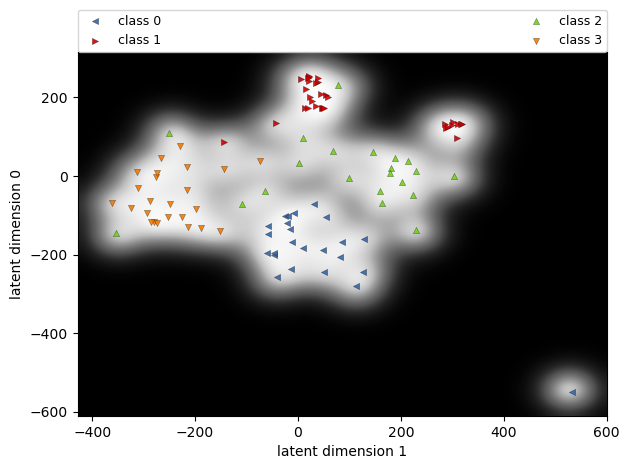

In [9]:
#latent dimension = q
q = 2

#digits gplvm
d_gplvm2 = GPy.models.GPLVM(d_sub_gp, q, kernel = GPy.kern.RBF(q))

d_gplvm2.optimize(messages = 0)

d_gplvm2.plot_latent(labels = labels)
plt.show()

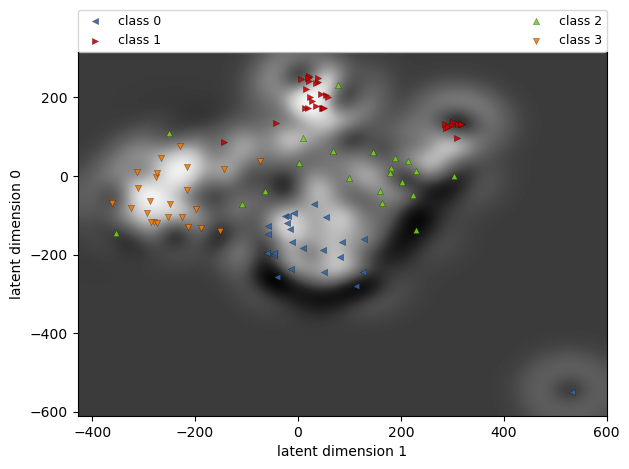

In [10]:
d_gplvm2.plot_magnification(labels=labels, covariance = True)
plt.show()

d_gplvm2.kern.plot_ARD()
plt.show()

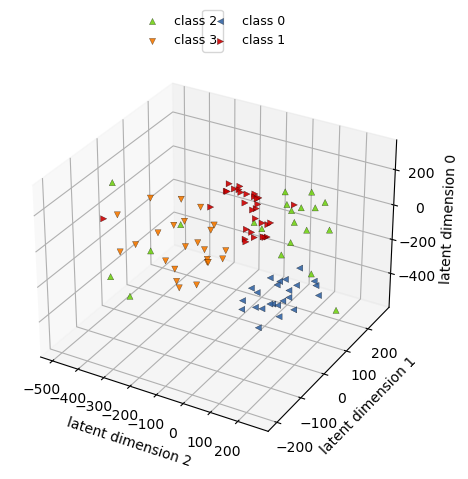

In [11]:
#latent dimension = 3

#digits gplvm
d_gplvm3 = GPy.models.GPLVM(d_sub_gp, 3, kernel = GPy.kern.RBF(3))

d_gplvm3.optimize(messages = 0)

d_gplvm3.plot_scatter(projection='3d', labels=labels)
plt.show()

### Put latent space coordinates into numpy arrays

In [12]:
coords1 = np.empty((len(d_gplvm1.X), q))

for i in np.arange(0,len(d_gplvm1.X),1): # i is observation index
    for j in np.arange(0,q,1): # j is dimension index
        coords1[i,j] = d_gplvm1.X[i][j] 

In [13]:
coords2 = np.empty((len(d_gplvm2.X), q))

for i in np.arange(0,len(d_gplvm2.X),1): # i is observation index
    for j in np.arange(0,q,1): # j is dimension index
        coords2[i,j] = d_gplvm2.X[i][j] 

In [14]:
coords3 = np.empty((len(d_gplvm3.X), 3))

for i in np.arange(0,len(d_gplvm3.X),1): # i is observation index
    for j in np.arange(0,3,1): # j is dimension index
        coords3[i,j] = d_gplvm3.X[i][j] 

### Calculate kNN classifier accuracy scores

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [16]:
res = train_test_split(coords1, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

knn = KNeighborsClassifier() # using default k = 5
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

score1 = accuracy_score(predicted, test_labels)

 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [17]:
res = train_test_split(coords2, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

score2 = accuracy_score(predicted, test_labels)

 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [18]:
res = train_test_split(coords3, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

knn = KNeighborsClassifier()
knn.fit(train_data, train_labels) 

predicted = knn.predict(test_data)

score3 = accuracy_score(predicted, test_labels) # add argument normalize = False to show 
# the number of correct classifications rather than rate

 /Users/fatmagulgok/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning:Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


In [19]:
print("kNN accuracy for Linear kernel: ", score1)
print("kNN accuracy for 2-d RBF kernel: ", score2)
print("kNN accuracy for 3-d kernel: ", score3)

kNN accuracy for Linear kernel:  0.85
kNN accuracy for 2-d RBF kernel:  0.95
kNN accuracy for 3-d kernel:  0.95


In [22]:
print(d_gplvm1.log_likelihood())
print('------------------------------------------------------------------------')
print(d_gplvm2.log_likelihood())
print('------------------------------------------------------------------------')
print(d_gplvm3.log_likelihood())

-257108126.13924465
------------------------------------------------------------------------
-417579.87346982636
------------------------------------------------------------------------
-413108.25525246817
